# Example #2: Exploring Data Science with Python - Analyzing Sea Level Trends

In this exercise, we will be importing, analyzing, and plotting NOAA Tide Gauge data to interpret and visualize sea level trends for two sites in MA. We will be learning and utilizing these skills:

- Importing CSVs and converting them to a usable format with *pandas*
- Plotting data with *matplotlib*
- Creating functions

*Optional:*
- Fitting a regression model to imported data with *sklearn*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### 1. Import & Clean Data
Let's begin with bringing our tide gauge data into python. I've included two CSV files for sea level data - please click on one of these files to examine the input format. For this first part, we'll be using the Woods Hole data, and working with the `pandas` library. It is best to use `pandas` when working with tabular data, but you can also read & work with files using `numpy`.

In [2]:
# use the pandas read_csv function to bring in the data, and assign it to a variable
wh_sl = pd.read_csv('Woods_Hole_MA.csv')

# print the data type - what does read_csv assign this new variable?
print(type(wh_sl))

<class 'pandas.core.frame.DataFrame'>


To make sure the data was imported correctly, we can examine the first few rows using the `head()` function on the dataframe.

In [3]:
# name_of_dataframe.head()
wh_sl.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
1932,8,-0.180,-0.163,-0.154,-0.172,NaN
1932,9,-0.142,-0.163,-0.154,-0.171,NaN
1932,10,-0.219,-0.162,-0.154,-0.171,NaN
1932,11,-0.141,-0.162,-0.154,-0.171,NaN
1932,12,-0.159,-0.162,-0.153,-0.171,NaN


We can also examine the last few rows using the `tail()` function.

In [4]:
# name_of_dataframe.tail()
wh_sl.tail()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
2020,9,0.133,0.097,0.106,0.088,NaN
2020,10,0.107,0.097,0.106,0.089,NaN
2020,11,0.063,0.097,0.106,0.089,NaN
2020,12,0.144,0.098,0.106,0.089,NaN
2021,1,0.206,0.098,0.107,0.089,NaN


The `info()` function provides a description of the rows, columns, and datatypes in our dataframe:

In [5]:
# name_of_dataframe.info()
wh_sl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 1932 to 2021
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1018 non-null   int64  
 1    Month         1018 non-null   float64
 2    Monthly_MSL   1018 non-null   float64
 3    Linear_Trend  1018 non-null   float64
 4    High_Conf.    1018 non-null   float64
 5    Low_Conf.     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 55.7 KB


The first row of text tells us what the datatype of our input variable is (in this case, a dataframe which we identified above). Following that, we can see the number of rows for all columns, as well as the number of columns in the dataframe. What's neat about this function as well is you can see the specific datatype of values for each respective column. For example, the values in `Year` are all integers, and the specific mean sea level measurement values (`Monthly_MSL`) are floats.

The `describe()` function provides statistical information on each column of the dataframe:

In [6]:
# name_of_dataframe.describe()
wh_sl.describe()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,0.0
mean,6.516699,-0.032008,-0.031818,-0.025754,-0.037880,NaN
std,3.461009,0.089410,0.076622,0.076592,0.076675,NaN
min,1.000000,-0.309000,-0.163000,-0.154000,-0.172000,NaN
25%,4.000000,-0.101000,-0.100000,-0.094750,-0.106000,NaN
50%,7.000000,-0.040000,-0.028000,-0.024000,-0.032500,NaN
75%,10.000000,0.029750,0.034000,0.040000,0.028750,NaN
max,12.000000,0.275000,0.098000,0.107000,0.089000,NaN


Now that our data is successfully imported into Python, there's just a couple things we need to fix to make our data more usable.

If you notice in the printed dataframe above, the dates are bolded in the left most column. It looks like our columns are mislabeled as well. 

When Python read in the file, it assigned the first column of the CSV as the table index. This shifted all of the column names over, leaving a column of NaN for our `Low_Coef` parameter. But not to fear! This is an easy fix. We'll incorporate some more pandas functions to process our data into a more usable and accurate format.

In [7]:
# first we reset the index to move the years into the data frame using the .reset_index() function
wh_sl2 = wh_sl.reset_index()

## it is good practice to assign new variable names when you are changing aspects of the original dataframe. 
## that way, if you make a mistake, the original data is preserved in python!

# look at data to make sure everything is correct using .head()
wh_sl2.head()

,index,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1932,8,-0.180,-0.163,-0.154,-0.172,NaN
1,1932,9,-0.142,-0.163,-0.154,-0.171,NaN
2,1932,10,-0.219,-0.162,-0.154,-0.171,NaN
3,1932,11,-0.141,-0.162,-0.154,-0.171,NaN
4,1932,12,-0.159,-0.162,-0.153,-0.171,NaN


In [8]:
## we need to overwrite the dataframe to shift our column names to the correct spots. 
## we do this by creating a new dataframe and assigning it to a new variable

# index the existing column names we want (i.e., Year onwards) and assigning them to a specific variable
colNames = wh_sl2.columns[1:]

# creating the new dataframe by indexing the columns we want - this will remove the NaN column we don't need
wh_sl3 = wh_sl2[wh_sl2.columns[0:6]]

# reassign column names to their proper place
wh_sl3.columns = colNames

# look at the dataframe to make sure everything is correct
wh_sl3.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1932,8,-0.180,-0.163,-0.154,-0.172
1,1932,9,-0.142,-0.163,-0.154,-0.171
2,1932,10,-0.219,-0.162,-0.154,-0.171
3,1932,11,-0.141,-0.162,-0.154,-0.171
4,1932,12,-0.159,-0.162,-0.153,-0.171


Hooray! We've now have our data cleaned up in a usable format and ready for analysis. We're ready to move onto the next step in this exercise.

### 2. Plot Sea Level Data

We are ready to plot our newly cleaned up sea level data. We'll be using the `matplotlib` library to visual monthly mean sea level through time for Woods Hole.

First, let's assign some variables to values from the dataframe to save us some typing:

In [9]:
# index the Years and Monthly_MSL columns from the dataframe into separate variables
years = wh_sl3.loc[:,'Year']
msl = wh_sl3.loc[:,' Monthly_MSL']

print(years)
print(msl)

0       1932
1       1932
2       1932
3       1932
4       1932
        ... 
1013    2020
1014    2020
1015    2020
1016    2020
1017    2021
Name: Year, Length: 1018, dtype: int64
0      -0.180
1      -0.142
2      -0.219
3      -0.141
4      -0.159
        ...  
1013    0.133
1014    0.107
1015    0.063
1016    0.144
1017    0.206
Name:  Monthly_MSL, Length: 1018, dtype: float64


Below are commands to plot MSL as a solid black line. We also assign labels to the x and y axis, as well as give the plot a title.

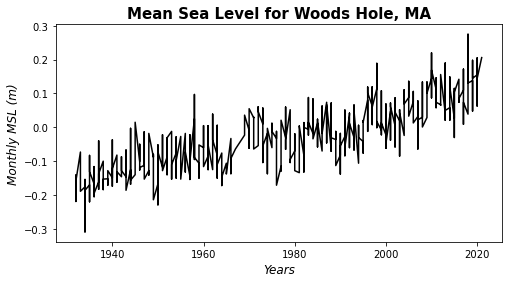

In [10]:
# create a figure
fig = plt.figure(figsize=plt.figaspect(0.5))
# create a line graph
plt.plot(years,msl, color='k');
# add X & Y axis labels
plt.xlabel('Years',style='italic',fontsize=12);
plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
# add a title
plt.title('Mean Sea Level for Woods Hole, MA', weight='bold',fontsize=15);
# show plot
plt.show()

Looks awesome! We have so far imported data, processed it into a usable format, and have not visualized our plot with a line graph. Great work!

There are other functions within the `matplotlib` library to further customize plots that you create. You can find those & their descriptions in the library documentation (linked in **Relevant Libraries** from main notebook) or with the cheat sheet (linked in **Resources** from main notebook).

### 3. Constructing Functions

We now have an established workflow to extract, process, and plot sea level data. Wouldn't it be nice if we could use this with other sea level rise data sets? This is where functions come in to help!

A function takes generic input variables, performs a series of operations on them (including calculations, data processing, plotting, etc.), and returns a specified variable, figure, or even dataset! These can be written within a script, or as a separate python file. Functions are helpful because:
1. You don't have to rewrite the same block of code over & over again
2. Figure specifics can be standardized
3. Open source potential!

For this part of the exercise, we will take our workflow from steps 1 & 2 and combine them all into one function called `plot_sl`.

In [11]:
def plot_sl(filename):
    # you have the option to include import statements for specific libraries used in the function here. i recommend doing this if you are writing your functions in a separate script!
    
    # data processing part
    df = pd.read_csv(filename)
    df2 = df.reset_index()
    colNames = df2.columns[1:]
    df3 = df2[df2.columns[0:6]]
    df3.columns = colNames
    
    # plot mean sea level
    yrs = df3.loc[:,'Year']
    msl = df3.loc[:, ' Monthly_MSL']
    
    # this code block extracts the site name with some fun string indexing & functions
    siteName = filename[:-4].replace('_', ' ')
    siteName = siteName[:-3] + ',' + siteName[-3:]
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    plt.plot(yrs,msl, color='k');
    plt.xlabel('Years',style='italic',fontsize=12);
    plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
    plt.title('Mean Sea Level for ' + siteName, weight='bold',fontsize=15);
    return df3

Now let's test our function on the Boston NOAA Tide Gauge Data:

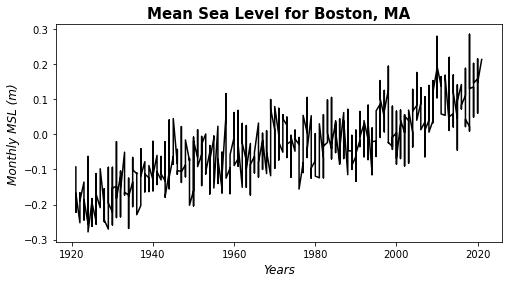

In [12]:
plot_sl('Boston_MA.csv'); #the ; suppresses the function output, if we deleted this we would see the dataframe

It works! We now have a convienent function to use to visualize and process sea level data for any NOAA Tide Gauge station. Functions are a wonderful part of any coding language, especially Python (can you tell that I am a huge fan??).

This concludes the in-person section of the excerise. Below is an optional addition to the exercise that fits and plots a linear model to our sea level data using the `sklearn` machine learning library. If you are interested in data analysis, I highly recommend you work through the next section on your own time (if we don't get to it in class).

## Exercise #2 Optional Skills Practice

### 4. Fit a regression model

In order to estimate rates of sea level change, NOAA fits a simple linear regression model to the monthly mean sea level (MSL) data. We'll be replicating this approach and fitting our own linear model with our newly cleaned data, using the machine learning library `sklearn`.

If you haven't learned about regressions or don't remember them from previous course work, do not fret! John & Arianna will be reviewing these statistical tools in their classes, **Probability & Statistics** and **Data Analysis**, later in the summer. I highly encourage checking those out if you will be working with a lot of data for your research!

In [13]:
# first, assign our input and output variables to construct the model

# we have to convert these columns of datas into 1D arrays to use with the sklearn functions. we assign the variables using np.array(), and change the dimensions of the array with .reshape()
# the -1 in reshape means numpy has to figure out that dimension (i.e., in this case, an unknown number of rows)
yrs = np.array(wh_sl3.loc[:,'Year']).reshape(-1,1) #loc isolates rows and/or columns based on labels
msl = np.array(wh_sl3.iloc[:,2]).reshape(-1,1) #iloc isolates rows and/or based on index
#remember python indexing starts at 0!

# make sure we got the right data!
print(yrs)
print() # just an empty space to separate our two arrays
print(msl)

[[1932]
 [1932]
 [1932]
 ...
 [2020]
 [2020]
 [2021]]

[[-0.18 ]
 [-0.142]
 [-0.219]
 ...
 [ 0.063]
 [ 0.144]
 [ 0.206]]


These arrays should match their respective columns in the dataframe above. Now we can bring in our linear model setup from sklearn.

In [14]:
# initialize and fit the linear regression model
lm = LinearRegression().fit(yrs,msl)
lm.score(yrs,msl) # this extracts our R^2 value

0.737317990003947

In [15]:
# use fitted linear model to model predicted MSL values
modeled_msl = lm.predict(yrs)

In [16]:
# extract the model coefficient and intercept
slope = lm.coef_
intcpt = lm.intercept_

print('The rate of sea level change for Woods Hole, MA is: ', round(float(slope),3),' meters per year.')

The rate of sea level change for Woods Hole, MA is:  0.003  meters per year.


Neat! We just extracted a rate of sea level rise in meters per year for Woods Hole. We can now overlay the calculated regression line to our raw MSL data we plotted before to examine the fit.

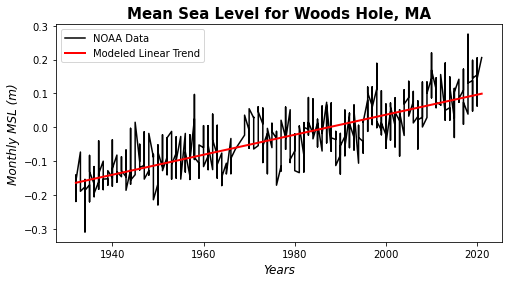

Model score (R²):  0.74
The rate of sea level change for Woods Hole, MA is:  0.003  meters per year.


In [17]:
fig = plt.figure(figsize=plt.figaspect(0.5))
plt.plot(years,msl, color='k');
plt.xlabel('Years',style='italic',fontsize=12);
plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
plt.title('Mean Sea Level for Woods Hole, MA', weight='bold',fontsize=15);

# add regression line
plt.plot(yrs, modeled_msl, color='r', linewidth=2.0)
plt.legend(['NOAA Data','Modeled Linear Trend'])
plt.show()

# print out model specifications
print('Model score (R\u00b2): ', round(float(lm.score(yrs,msl)),2))
print('The rate of sea level change for Woods Hole, MA is: ', round(float(slope),3), ' meters per year.')

Congratulations! We just fitted a linear sea level rise model for Woods Hole. This concludes the data science section of the class. 